In [1]:
import numpy as np
import math
import pandas as pd
import networkx as nx
import random
import collections
import matplotlib.pyplot as plt

# Trabajo final para evaluación de Métodos Numéricos de la Mestría de Ciencia de Datos (equipo 3)
* Jorge García (202945)
* Sandra España (203200)
* Aline Pérez (203096)
* Marco Antonio Ramos (142244)

Este trabajo busca implementar un problema de optimización de distancia recorrida en el metro de la CDMX.

# Creación de la matriz de adyacencias entre las estaciones del metro

Se obtuvo la base de datos de longitud entre estaciones del metro de la CDMX (long_interestacion) y la longitud de la estación (long_estacion). De la misma manera, se creó una lista con todas las estaciones del metro. Los datos originales se pueden consultar en la siguiente [liga](https://metro.cdmx.gob.mx/longitud-de-estacion)

In [7]:
metro1=pd.read_excel('Data1/distancia_metro.xlsx')
np.set_printoptions(precision=2)
nodos1=list(dict.fromkeys(pd.concat([metro1["Estacion1"],metro1["Estacion2"]])))
N=len(nodos1)

Se creó la matriz de adyacencias, en la cual los nodos son las estaciones y los valores son las distancias en metros

In [5]:
df1=np.zeros((N,N))
adyacencia1=pd.DataFrame(df1)
adyacencia1.columns=adyacencia1.index=nodos1

for i in nodos1:
    for j in nodos1:
        adyacencia1[i][j]=metro1[(metro1["Estacion1"]==i)&(metro1["Estacion2"]==j)]["Long_interestacion"]

adyacencia1=adyacencia1.fillna(0)
adyacencia1=np.transpose(adyacencia1)+adyacencia1
print(adyacencia1)

                      Pantitlan  Zaragoza  GomezFarias  BoulevardPuertoAereo  \
Pantitlan                   0.0    1320.0          0.0                   0.0   
Zaragoza                 1320.0       0.0        762.0                   0.0   
GomezFarias                 0.0     762.0          0.0                 611.0   
BoulevardPuertoAereo        0.0       0.0        611.0                   0.0   
Balbuena                    0.0       0.0          0.0                 595.0   
...                         ...       ...          ...                   ...   
MartinCarrera               0.0       0.0          0.0                   0.0   
BarrancadelMuerto           0.0       0.0          0.0                   0.0   
Constitucionde1917          0.0       0.0          0.0                   0.0   
LaPaz                       0.0       0.0          0.0                   0.0   
Buenavista                  0.0       0.0          0.0                   0.0   

                      Balbuena  Moctezu

Verificamos que no haya columnas que no tengan distancias en ninguna de sus entradas

In [6]:
print("máxima distancia por estación\n")
print("\n",np.max(adyacencia1))
print("\nverificamos que no haya un máximo igual a cero (es decir, que todas las estaciones tengan al menos una adyacencia)\n")
print("\n",np.sort(np.max(adyacencia1)))

máxima distancia por estación


 Pantitlan               1644.0
Zaragoza                1320.0
GomezFarias              762.0
BoulevardPuertoAereo     611.0
Balbuena                 703.0
                         ...  
MartinCarrera           1141.0
BarrancadelMuerto       1476.0
Constitucionde1917      1137.0
LaPaz                   1956.0
Buenavista               521.0
Length: 164, dtype: float64

verificamos que no haya un máximo igual a cero (es decir, que todas las estaciones tengan al menos una adyacencia)


 [ 445.  456.  516.  521.  564.  574.  587.  602.  611.  611.  611.  620.
  634.  637.  645.  653.  657.  657.  659.  665.  665.  698.  702.  703.
  703.  709.  709.  715.  725.  725.  732.  745.  745.  750.  755.  757.
  761.  762.  774.  788.  789.  793.  793.  794.  817.  817.  843.  860.
  884.  908.  908.  908.  910.  910.  924.  924.  942.  950.  959.  968.
  969.  969.  973.  993.  993. 1033. 1033. 1042. 1059. 1060. 1060. 1062.
 1067. 1072. 1084. 1106. 1110. 1110. 1111

# Creación del grafo de la matriz de adyacencias

In [9]:
def adj_matrix_2_edge_list(adj_matrix, index_name):
    """
    Esta función solamente transforma cualquier matriz cuadrada en una 
    lista de tuplas en el formato "edges list", lo cuál es muy útil
    para realizar los grafos. 
    
    Funciona iterando sobre los indices de la matriz, tomando i y j y 
    el valor respectivo. Elimina la traza para evitar grafos ciclicos.
    
    Index_name debe tener el mismo número de columnas que adj_matrix
    
    """
    edge_list = []
    matrix_len= len(adj_matrix)
    for i in range(matrix_len):
        for j in range(matrix_len):
                if i==j:
                    pass
                elif adj_matrix[i][j]==0:
                    pass
                else:
                    edge_list.append((index_name[i],index_name[j],adj_matrix[i][j]))
    edge_list = tuple(edge_list) 
    return edge_list

In [10]:
matrix = np.asarray(adyacencia1.values)
names = adyacencia1.index

In [11]:
names = adyacencia1.index

In [12]:
names[1]

'Zaragoza'

In [13]:
G_d = adj_matrix_2_edge_list(matrix, names)

In [14]:
G_d[1:10]

(('Pantitlan', 'Hangares', 1644.0),
 ('Pantitlan', 'Puebla', 1380.0),
 ('Pantitlan', 'AgricolaOriental', 1409.0),
 ('Zaragoza', 'Pantitlan', 1320.0),
 ('Zaragoza', 'GomezFarias', 762.0),
 ('GomezFarias', 'Zaragoza', 762.0),
 ('GomezFarias', 'BoulevardPuertoAereo', 611.0),
 ('BoulevardPuertoAereo', 'GomezFarias', 611.0),
 ('BoulevardPuertoAereo', 'Balbuena', 595.0))

In [50]:

def adj_matrix_2_edge_list(adj_matrix):
    """
    Esta función solamente transforma cualquier matriz cuadrada en una 
    lista de tuplas en el formato "edges list", lo cuál es muy útil
    para realizar los grafos. 
    
    Funciona iterando sobre los indices de la matriz, tomando i y j y 
    el valor respectivo. Elimina la traza para evitar grafos ciclicos.
    
    """
    edge_list = []
    matrix_len= len(adj_matrix)
    for i in range(matrix_len):
        for j in range(matrix_len):
                if i==j:
                    pass
                else:
                    edge_list.append((i,j,adj_matrix[i][j]))
    edge_list = tuple(edge_list) 
    return edge_list


def plot_weighted_graph(matriz_adj):
    """
    input: matriz de adj
    output: grafo con weighted edges
    Esta es la función que crea el grafo. Toma una matriz de adj,
    la convierte en una edges list y crea el grafo con cada vertices proporcional 
    al valor que recibe en la matriz de adj.
    
    """
    edges_list=adj_matrix_2_edge_list(matriz_adj)
    # tamaño de la matriz
    size=max([row[0] for row in edges_list])+1
    
    # Creamos el objeto grafo y le indicamos la cantidad de nodos
    G = nx.Graph() 
    node_list = range(size)
    for node in node_list:
        G.add_node(node)
 
    # Indicamos que queremos una distribución simétrica y circular de los nodos
    # esto lo podemos cambiar a cualquier otra presentaciòn estética
    pos=nx.spring_layout(G)
    #nx.draw_networkx_nodes(G,pos,node_color='blue',node_size=300)
    # Graficamos las red
    # graficamos en un canvass amplio 
    plt.figure(6,figsize=(16,16)) 
    nx.draw(
    G, pos, edge_color='black', width=1, 
        linewidths=1, node_size=600, node_color='pink', 
        alpha=0.9,with_labels = True)
    
    # Agregamos los datos de los vertices y pesos
    G.add_weighted_edges_from(edges_list)
    
    # Ahora pintamos de manera iterativa cada vertice y su peso
    # a la par que normalizamos los pesos para que los vertices no nos salgan tan desproporcionados
    tupla_pesos = []
    for (node1,node2,data) in G.edges(data=True):
        tupla_pesos.append(data['weight']) #we'll use this when determining edge thickness
 
    pesos_unicos = list(set(tupla_pesos))
    for i in pesos_unicos:
        vertices_con_peso = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==i]
        # normalizamos un poco los pesos para que la anchura sea proporcional a su peso
        # este *1 lo tenemos que aumentar cuando haya pocos nodos y disminuir cuando 
        # haya más por cuestiones esteticas
        anchura = i*len(node_list)*.75/sum(tupla_pesos)
        nx.draw_networkx_edges(G,pos,edgelist=vertices_con_peso,width=anchura)
 
    plt.axis('off')
    plt.title('Grafo con vertices proporcionales (valor abs)')
    plt.show() 

def plot_labeled_graph(matriz_adj):
    """
    input: matriz de adj
    output: grafo con pesos no visibles
    
    """
    edges_list=adj_matrix_2_edge_list(matriz_adj)
    # tamaño de la matriz
    size=max([row[0] for row in edges_list])+1
    
    # Creamos el objeto grafo y le indicamos la cantidad de nodos
    G = nx.Graph() 
    node_list = range(size)
    for node in node_list:
        G.add_node(node)


    # Agregamos la lista de pesos en un diccionario para que sea fácil de interpretar por la función.

    G.add_weighted_edges_from(edges_list)
    edge_labels = dict([((n1, n2), round(d['weight'], 2))
                    for n1, n2, d in G.edges(data=True)])
    # graficamos en un canvass amplio 
    plt.figure(6,figsize=(16,16)) 

    # Indicamos que queremos una distribución simétrica y circular de los nodos
    # esto lo podemos cambiar a cualquier otra presentaciòn estética
    pos=nx.spring_layout(G)
    #pos = nx.spring_layout(G) #este lo activamos si queremos una gráfica asimétrica

    # Graficamos las red

    nx.draw(
    G, pos, edge_color='black', width=1, 
        linewidths=1, node_size=600, node_color='pink', 
        alpha=0.9,with_labels = True)
    # Graficamos las labels de los pesos
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,font_size=10)
 
    plt.axis('off')
    plt.title('Grafo con etiquetas de pesos')
    plt.show()

In [48]:
matrix

array([[   0., 1320.,    0., ...,    0.,    0.,    0.],
       [1320.,    0.,  762., ...,    0.,    0.,    0.],
       [   0.,  762.,    0., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

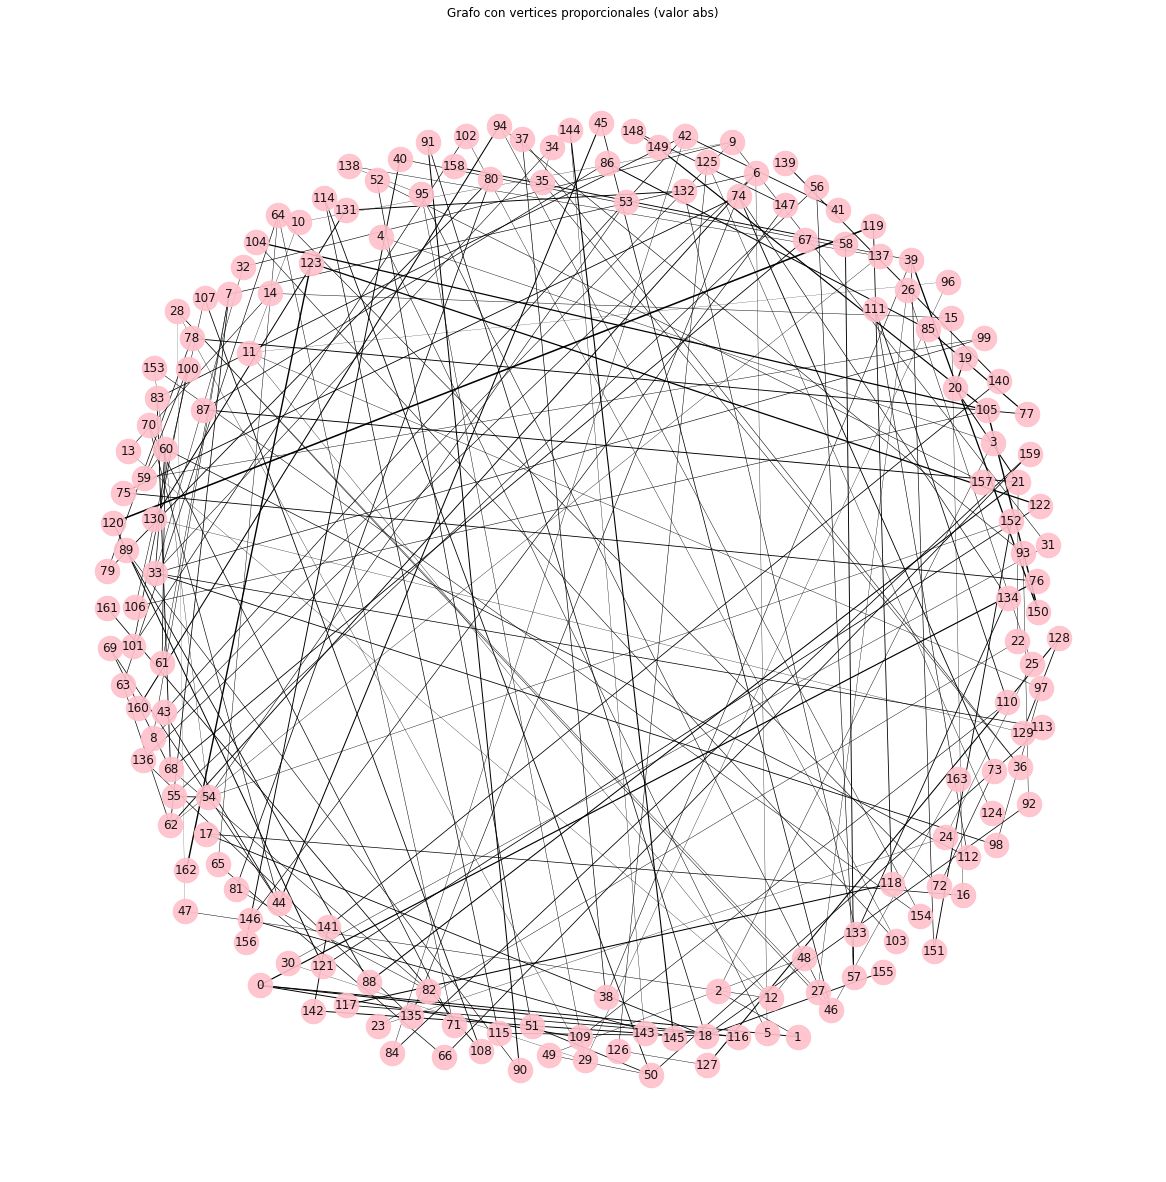

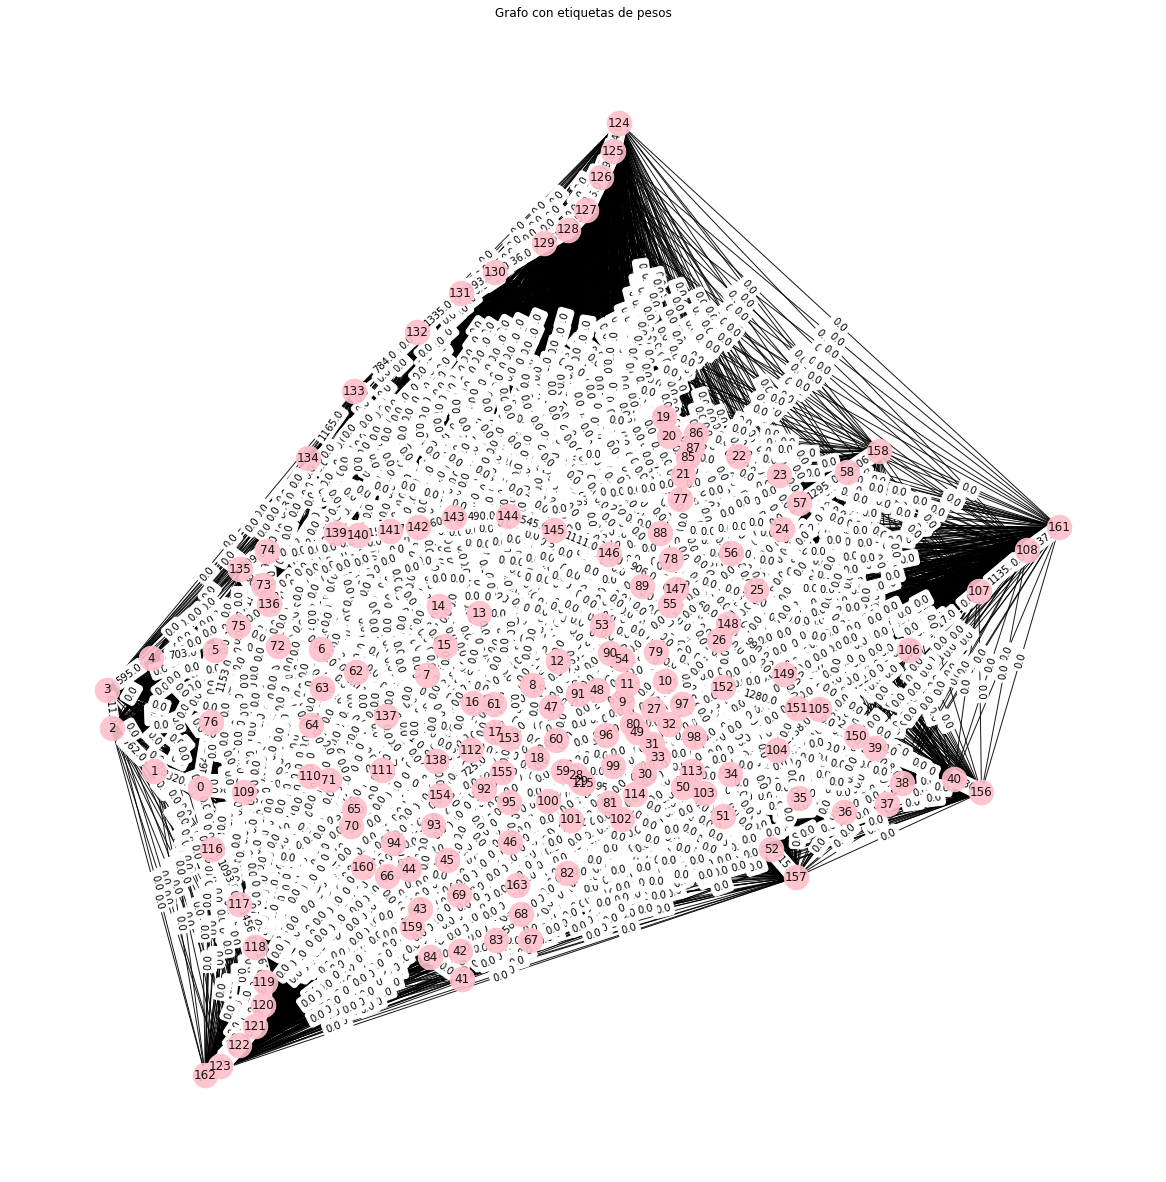

In [51]:


matrix = np.asarray(adyacencia1.values)
names = adyacencia1.index


plot_weighted_graph(matrix)

plot_labeled_graph(matrix)

['ElRosario',
 'Tezozomoc',
 'Azcapotzalco',
 'Ferreria',
 'Norte45',
 'Vallejo',
 'InstitutodelPetroleo',
 'Lindavista',
 'Deportivo18deMarzo']

In [ ]:
nx.dijkstra_path(G, 'ElRosario', 'Deportivo18deMarzo')